In [4]:
using DataFrames
using GLM
using PyPlot
using Statistics

In [7]:
aq = [10.0  8.04 10.0  9.14  10.0  7.46  8.0  6.58
       8.0  6.95  8.0  8.14   8.0  6.77  8.0  5.76
      13.0  7.58 13.0  8.74  13.0 12.74  8.0  7.71
       9.0  8.81  9.0  8.77   9.0  7.11  8.0  8.84 
      11.0  8.33 11.0  9.26  11.0  7.81  8.0  8.47
      14.0  9.96 14.0  8.10  14.0  8.84  8.0  7.04
       6.0  7.24  6.0  6.13   6.0  6.08  8.0  5.25
       4.0  4.26  4.0  3.10   4.0  5.39 19.0 12.50
      12.0 10.84 12.0  9.13  12.0  8.15  8.0  5.56
       7.0  4.82  7.0  7.26   7.0  6.42  8.0  7.91
       5.0  5.68  5.0  4.74   5.0  5.73  8.0  6.89]

11×8 Matrix{Float64}:
 10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
  8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
 13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
  9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
 11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
 14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
  6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
  4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.5
 12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
  7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
  5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [8]:
df = DataFrame(aq, :auto)

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [9]:
newnames = vec(string.(['x', 'y'], [1 2 3 4]))

8-element Vector{String}:
 "x1"
 "y1"
 "x2"
 "y2"
 "x3"
 "y3"
 "x4"
 "y4"

In [10]:
rename!(df, newnames)

,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [11]:
DataFrame(aq, [:x1, :y1, :x2, :y2, :x3, :y3, :x4, :y4])

,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [12]:
df.y1

11-element Vector{Float64}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

In [14]:
df."y1"

11-element Vector{Float64}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

In [15]:
df[:, :y1]

11-element Vector{Float64}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

In [17]:
# reorder cols
select!(df, r"x", :)

,x1,x2,x3,x4,y1,y2,y3,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


In [18]:
describe(df, mean => :mean, std => :std)

,variable,mean,std
,Symbol,Float64,Float64
1,x1,9.0,3.31662
2,x2,9.0,3.31662
3,x3,9.0,3.31662
4,x4,9.0,3.31662
5,y1,7.50091,2.03157
6,y2,7.50091,2.03166
7,y3,7.5,2.03042
8,y4,7.50091,2.03058


In [20]:
describe(df, mean => "mean", std => "std")

,variable,mean,std
,Symbol,Float64,Float64
1,x1,9.0,3.31662
2,x2,9.0,3.31662
3,x3,9.0,3.31662
4,x4,9.0,3.31662
5,y1,7.50091,2.03157
6,y2,7.50091,2.03166
7,y3,7.5,2.03042
8,y4,7.50091,2.03058


In [22]:
df.id = 1:nrow(df)
df

,x1,x2,x3,x4,y1,y2,y3,y4,id
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58,1
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76,2
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71,3
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84,4
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47,5
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04,6
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25,7
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5,8
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56,9


In [23]:
ncol(df)

9

In [24]:
select(df, :id, :)

,id,x1,x2,x3,x4,y1,y2,y3,y4
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


In [25]:
df

,x1,x2,x3,x4,y1,y2,y3,y4,id
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58,1
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76,2
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71,3
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84,4
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47,5
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04,6
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25,7
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5,8
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56,9


In [26]:
Matrix(df)

11×9 Matrix{Float64}:
 10.0  10.0  10.0   8.0   8.04  9.14   7.46   6.58   1.0
  8.0   8.0   8.0   8.0   6.95  8.14   6.77   5.76   2.0
 13.0  13.0  13.0   8.0   7.58  8.74  12.74   7.71   3.0
  9.0   9.0   9.0   8.0   8.81  8.77   7.11   8.84   4.0
 11.0  11.0  11.0   8.0   8.33  9.26   7.81   8.47   5.0
 14.0  14.0  14.0   8.0   9.96  8.1    8.84   7.04   6.0
  6.0   6.0   6.0   8.0   7.24  6.13   6.08   5.25   7.0
  4.0   4.0   4.0  19.0   4.26  3.1    5.39  12.5    8.0
 12.0  12.0  12.0   8.0  10.84  9.13   8.15   5.56   9.0
  7.0   7.0   7.0   8.0   4.82  7.26   6.42   7.91  10.0
  5.0   5.0   5.0   8.0   5.68  4.74   5.73   6.89  11.0

In [27]:
xlim = collect(extrema(Matrix(select(df, r"x"))) .+ (-1, 1))

2-element Vector{Float64}:
  3.0
 20.0

In [28]:
# R: range(matrix(df[, grepf('x', names(df))]))
extrema(Matrix(select(df, r"x"))) 

(4.0, 19.0)

In [29]:
ylim = collect(extrema(Matrix(select(df, r"y"))) .+ (-1, 1))

2-element Vector{Float64}:
  2.1
 13.74

In [30]:
Symbol("x", 1)

:x1

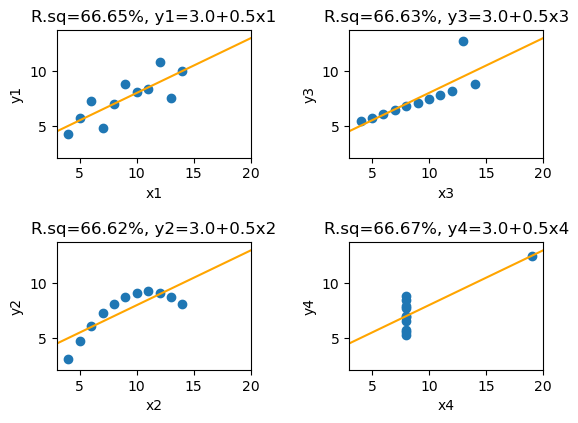

In [32]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=4.0)

for i in 1:4
    x = Symbol("x", i)
    y = Symbol("y", i)
    mod = lm(term(y) ~ term(x), df)
    axs[i].plot(
        xlim, predict(mod, DataFrame(x => xlim)), color="orange")
    axs[i].scatter(df[:, x], df[:, y])
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xlabel("x$i")
    axs[i].set_ylabel("y$i")
    a, b = round.(coef(mod), digits=2)
    c = round(100 * r2(mod), digits=2)
    axs[i].set_title(string("R.sq=$c%, $y=$a+$b$x"))
end

In [33]:
x = :var1
y = :var2
xc = 1:3
yc = 4:6
DataFrame(x => xc, y => yc)

,var1,var2
,Int64,Int64
1,1,4
2,2,5
3,3,6


In [34]:
DataFrame(var1=xc, var2=yc)

,var1,var2
,Int64,Int64
1,1,4
2,2,5
3,3,6


In [35]:
# directly access cols in <df>; x1 as literal
df.x1 

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [36]:
# copy of the col (= copy(df.x1))
df[:, :x1]

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [37]:
n = :x1

:x1

In [38]:
# direct access (not a copy)
v = df[!, n]

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [39]:
v === df.x1

true